In [3]:
import numpy as np
import roboticstoolbox as rtb
from spatialmath import *
from math import pi
import matplotlib.pyplot as plt
from matplotlib import cm
from rrt import RRT

np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:8.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})

%matplotlib widget 

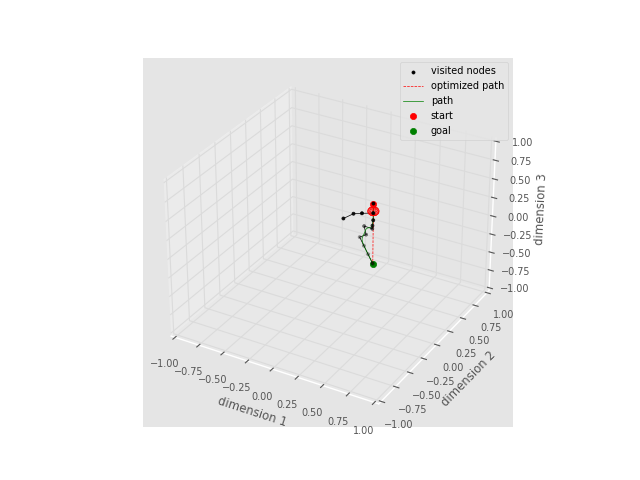

In [39]:
# 1. Choose dimension of the problem.
# 1. Choose dimension of the problem.
N = 3
# 2. Instantiate the RRT object with N, you may indicate the start and the goal configurations.
r = RRT(N, start=np.array([0.4,0 ,0.6]), goal=np.array([0.4,0 ,-0.2]))
# 3. Run the RRT planner
r.runRRT(mode='single')
# 4. Plot the results
r.plot()
path = r.get_path()

In [40]:
print(len(path))

200


Or: [     0.4        0      0.6]
[     0.4 1.353e-07      0.6]
Or: [     0.4 -8.782e-08      0.6]
[     0.4 4.749e-08      0.6]
Or: [     0.4 -4.251e-06      0.6]
[     0.4 -4.116e-06      0.6]
Or: [     0.4 -3.665e-05   0.5999]
[     0.4 -3.651e-05   0.5999]
Or: [  0.4001 -0.000156   0.5997]
[  0.4001 -0.0001558   0.5997]
Or: [  0.4002 -0.0004511   0.5993]
[  0.4002 -0.000451   0.5993]
Or: [  0.4006 -0.001022   0.5983]
[  0.4006 -0.001022   0.5983]
Or: [  0.4011 -0.001959   0.5968]
[  0.4011 -0.001959   0.5968]
Or: [  0.4018 -0.003321   0.5946]
[  0.4018 -0.003321   0.5946]
Or: [  0.4028 -0.005132   0.5916]
[  0.4028 -0.005132   0.5916]
Or: [   0.404 -0.007372    0.588]
[   0.404 -0.007373    0.588]
Or: [  0.4054 -0.009991   0.5837]
[  0.4054 -0.009992   0.5837]
Or: [   0.407 -0.01291   0.5789]
[   0.407 -0.01291   0.5789]
Or: [  0.4087 -0.01604   0.5737]
[  0.4087 -0.01604   0.5737]
Or: [  0.4105 -0.01927   0.5682]
[  0.4104 -0.01927   0.5682]
Or: [  0.4122 -0.02251   0.5626]
[  0.41

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[  0.3977 0.0007906  -0.1964]
Or: [  0.3981 0.0006378  -0.1971]
[  0.3981 0.000638  -0.1971]
Or: [  0.3985 0.0005022  -0.1977]
[  0.3985 0.0005025  -0.1977]
Or: [  0.3989 0.0003828  -0.1982]
[  0.3989 0.0003831  -0.1982]
Or: [  0.3992 0.0002796  -0.1987]
[  0.3992 0.0002799  -0.1987]
Or: [  0.3994 0.0001934  -0.1991]
[  0.3994 0.0001937  -0.1991]
Or: [  0.3996 0.0001247  -0.1994]
[  0.3996 0.000125  -0.1994]
Or: [  0.3998 7.341e-05  -0.1997]
[  0.3998 7.373e-05  -0.1997]
Or: [  0.3999 3.827e-05  -0.1998]
[  0.3999 3.859e-05  -0.1998]
Or: [     0.4 1.688e-05  -0.1999]
[     0.4 1.72e-05  -0.1999]
Or: [     0.4 5.836e-06     -0.2]
[     0.4 6.159e-06     -0.2]
Or: [     0.4 1.371e-06     -0.2]
[     0.4 1.695e-06     -0.2]
Or: [     0.4 1.591e-07     -0.2]
[     0.4 4.826e-07     -0.2]
Or: [     0.4 3.286e-09     -0.2]
[     0.4 3.268e-07     -0.2]
Or: [     0.4        0     -0.2]
[     0.4 3.235e-07     -0.2]
[0.3999991676798189, 0.39999921533252397, 0.40000147441905853, 0.4000190541057

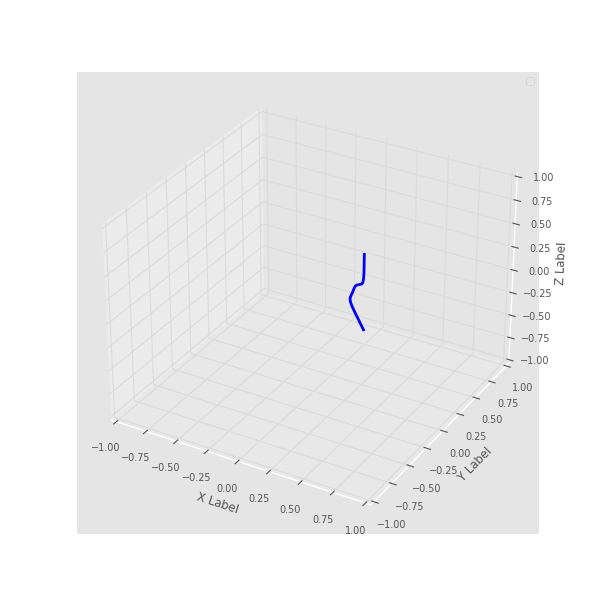

In [55]:
robot=rtb.models.DH.UR10()

X_w_obs=[]
Y_w_obs=[]
Z_w_obs=[]

X_alter=[]
Y_alter=[]
Z_alter=[]
q_sol=path

con_path=[]

for i in range(len(q_sol)):    

    TT= np.array([[1,   0,  0,  q_sol[i][0]],
                   [0,   1,  0,  q_sol[i][1]],
                   [0,   0,  1,  q_sol[i][2]],
                   [0,   0,  0,  1]])

    TT=SE3(TT, check=False)
    #print(TT)
    print("Or:",q_sol[i])
    real_sol = robot.ikine_LMS(TT) 
    con_path.append(real_sol[0])
    #print(real_sol[0])
    Path_alter=robot.fkine(real_sol[0])
    print(Path_alter.t)

    
    X_alter.append(Path_alter.t[0])
    Y_alter.append(Path_alter.t[1])
    Z_alter.append(Path_alter.t[2])

print(X_alter)    
plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')


ax.plot3D(X_alter, Y_alter,Z_alter,'b', linewidth=2.0)

ax.legend()

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


x_center, y_center, z_center = 0.3, -0.3, 1.2
radius = 0.1

ax.set_xlim(-1, 1)#
ax.set_ylim(-1, 1)#
ax.set_zlim(-1, 1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


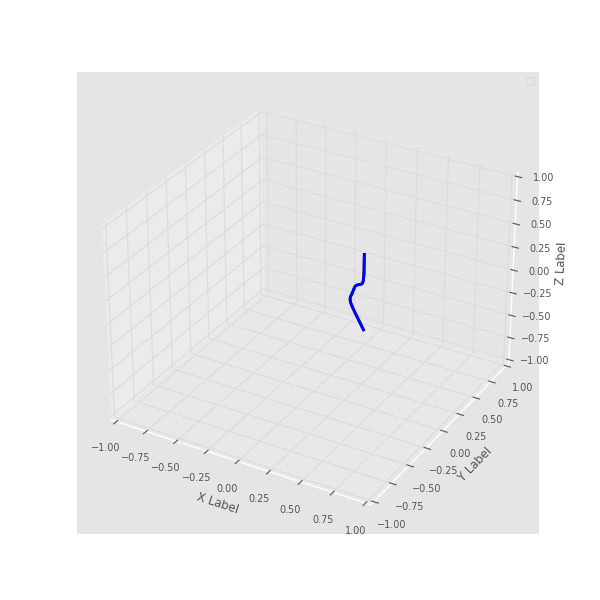

In [56]:
X = []
Y = []
Z = []
for point in path:
    X.append(point[0])
    Y.append(point[1])
    Z.append(point[2])

plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')



ax.plot3D(X, Y,Z,'k',linewidth=2.0)
ax.plot3D(X_alter, Y_alter,Z_alter,'b', linewidth=2.0)

ax.legend()

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


x_center, y_center, z_center = 0.3, -0.3, 1.2
radius = 0.1

ax.set_xlim(-1, 1)#
ax.set_ylim(-1, 1)#
ax.set_zlim(-1, 1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

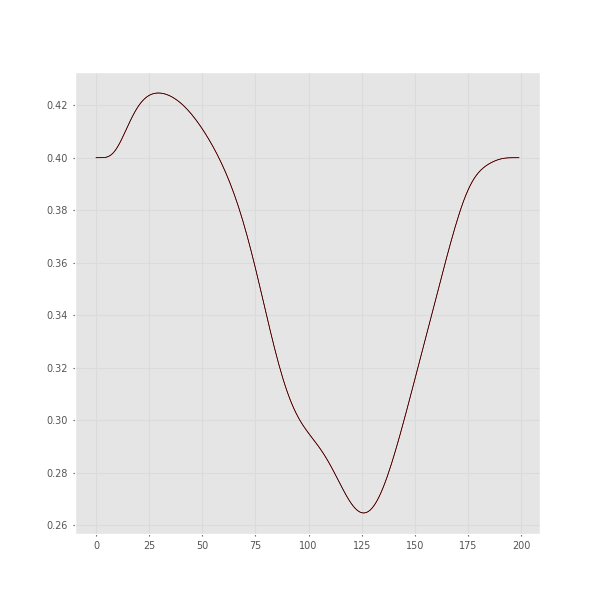

In [57]:
plt.figure(figsize=(6,6))

plt.plot(X,'r')
plt.plot(X_alter,'k')


In [58]:
con_path=np.array(con_path)


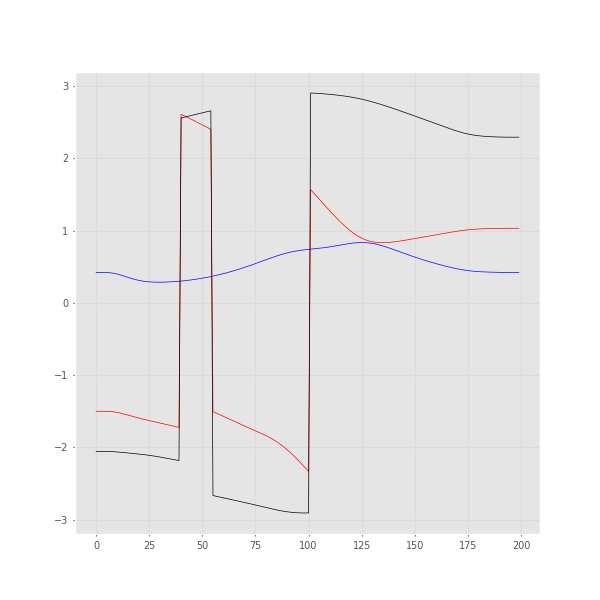

In [59]:
plt.figure(figsize=(6,6))

plt.plot(con_path[:,0],'b')
plt.plot(con_path[:,1],'r')
plt.plot(con_path[:,2],'k')


In [60]:
def continuer(a):
    path = a.tolist()
    new_path = []
    flip_seg = 0
    first = 0
    diff = 0
    ind = 0
    #start positive
    if path[0] < 0:
        for i in range(len(path)-1):
            # find intial value for diff
            if path[i] * path[i+1] < 0 and path[i] < 0:
                diff = abs(path[i+1] - path[i])
                temp = path[:i+1]
                new_path = [p + diff for p in temp]
                ind = i +1
                break

    plt.figure(figsize=(6,6))
    plt.plot(new_path,'r')
        

    for i in range(ind, len(path)-1):
        #first section negative

        if i != 0 and path[i-1] < 0 and path[i] > 0:
            flip_seg = 0
        if (i != 0 and path[i] * path[i-1] < 0 and path[i-1] > 0) or flip_seg == 1:
            if path[i] * path[i-1] < 0 and path[i-1] > 0 : 
                diff = abs(path[i] - path[i-1])
            flip_seg = 1
            new_path.append(path[i] + diff)
        else: 
            new_path.append(path[i])


    return np.array(new_path)
        

[   2.835    2.835    2.835    2.835    2.835    2.834    2.833    2.831    2.828    2.823    2.818
    2.812    2.805    2.798     2.79    2.781    2.773    2.764    2.756    2.748    2.741    2.733
    2.726    2.719    2.712    2.706    2.699    2.693    2.686    2.679    2.673    2.666    2.659
    2.653    2.646    2.639    2.632    2.626    2.619    2.612    2.612    2.598    2.583    2.569
    2.555     2.54    2.525     2.51    2.495     2.48    2.465     2.45    2.434    2.419    2.403
    2.403     2.39    2.377    2.364     2.35    2.337    2.323    2.309    2.296    2.282    2.268
    2.255    2.241    2.228    2.215    2.202    2.189    2.176    2.163     2.15    2.137    2.125
    2.111    2.098    2.084     2.07    2.055    2.039    2.022    2.005    1.986    1.966    1.945
    1.922    1.899    1.874    1.848     1.82    1.792    1.763    1.733    1.703    1.672     1.64
    1.609    1.577    1.568    1.536    1.503     1.47    1.437    1.404    1.371    1.338    1.306


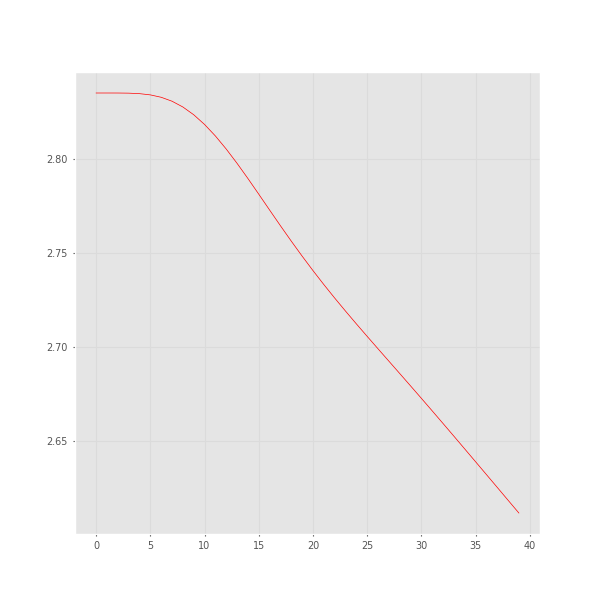

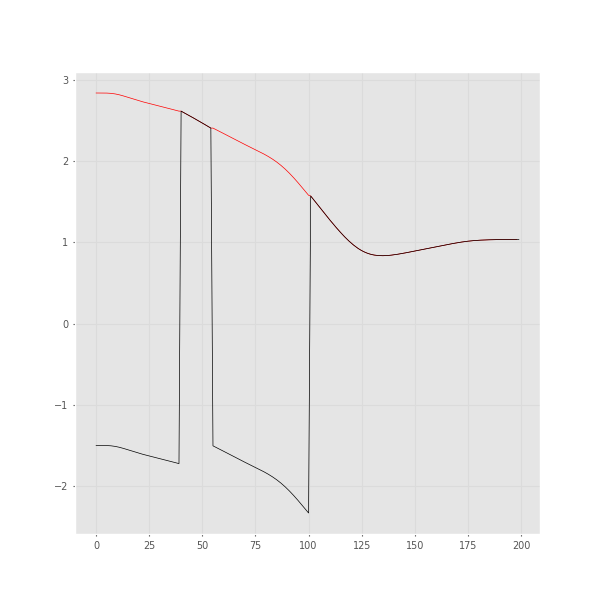

In [61]:
q1 = continuer(con_path[:,1])
plt.figure(figsize=(6,6))
plt.plot(q1,'r')
plt.plot(con_path[:,1],'k')
print(q1)


199
-1.943486909183889e-05


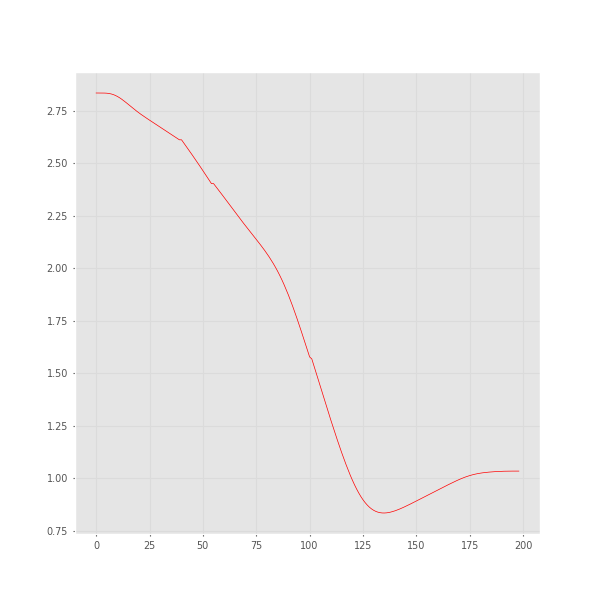

In [62]:
plt.figure(figsize=(6,6))
plt.plot(q1,'r')

q_alter = np.empty((6,N+1))


print(len(q1))
v_des=(q1[1]-q1[0])/0.01
print(v_des)


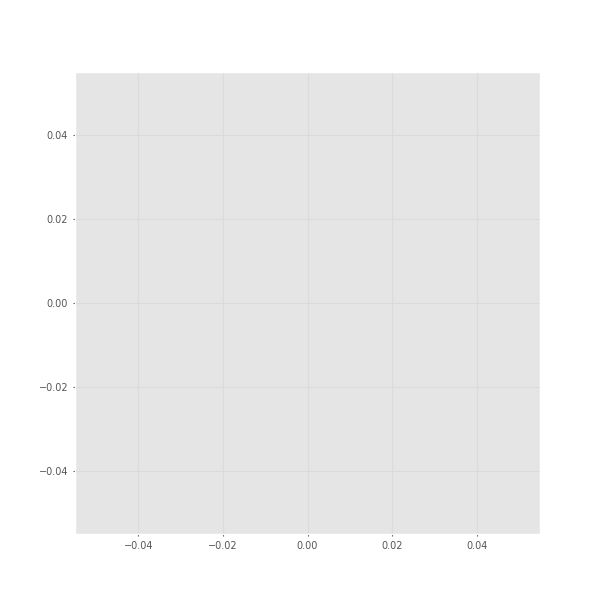

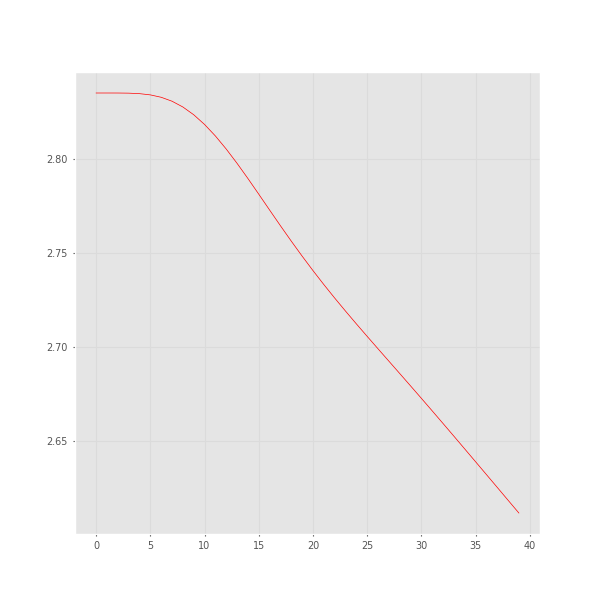

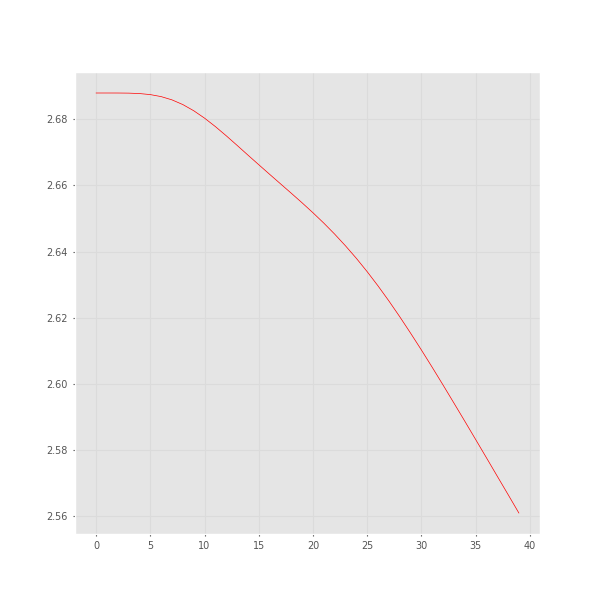

In [63]:
q1 = continuer(con_path[:,0])
q2 = continuer(con_path[:,1])
q3 = continuer(con_path[:,2])




In [52]:
robot=rtb.models.DH.UR10()

X_w_obs=[]
Y_w_obs=[]
Z_w_obs=[]

X_alter1=[]
Y_alter2=[]
Z_alter3=[]
q_sol=path

con_path=[]

for i in range(len(q1)):    


    Path_alter=robot.fkine([q1[i],q2[i],q3[i],0,0,0])
    
    X_alter1.append(Path_alter.t[0])
    Y_alter2.append(Path_alter.t[1])
    Z_alter3.append(Path_alter.t[2])




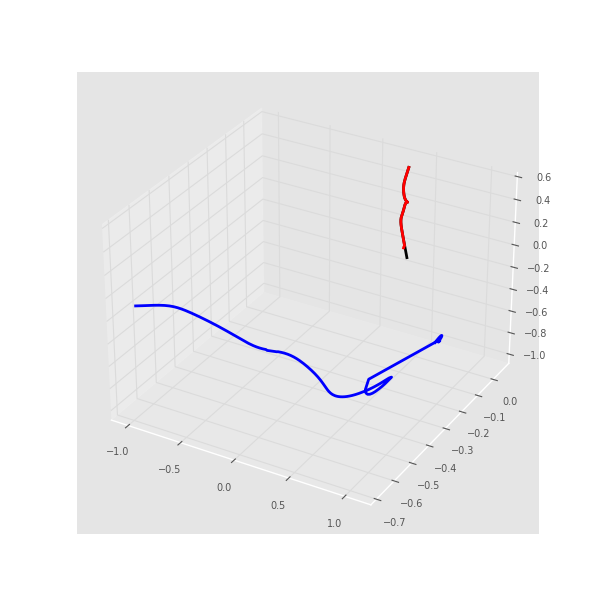

In [53]:
plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')



ax.plot3D(X, Y,Z,'k',linewidth=2.0)
ax.plot3D(X_alter, Y_alter,Z_alter,'r',linewidth=2.0)
ax.plot3D(X_alter1, Y_alter2,Z_alter3,'b', linewidth=2.0)


# control

In [21]:
dq_1= np.empty((199))
dq_2= np.empty((199))
dq_3= np.empty((199))


ddq_1= np.empty((199))
ddq_2= np.empty((199))
ddq_3= np.empty((199))



dq_1[0]=0
dq_1[-1]=0

dq_2[0]=0
dq_2[-1]=0

dq_3[0]=0
dq_3[-1]=0

dt=0.01

v1_cons=(q1[1]-q1[0])/dt
v2_cons=(q2[1]-q2[0])/dt
v3_cons=(q3[1]-q3[0])/dt

a1_cons=(v1_cons)/dt
a2_cons=(v2_cons)/dt
a3_cons=(v3_cons)/dt


ddq_1[0]=a1_cons
ddq_1[-1]=-a1_cons

ddq_2[0]=a2_cons
ddq_2[-1]=-a2_cons

ddq_3[0]=a3_cons
ddq_3[-1]=-a3_cons


for i in  range(1,len(q1)-1):
    dq_1[i]=v1_cons
    dq_2[i]=v2_cons
    dq_3[i]=v3_cons
    ddq_1[i]=0
    ddq_2[i]=0
    ddq_3[i]=0


In [22]:
q_des=np.array([q1[0],q2[0],q3[0],0,0,0])
dq_des=np.array([dq_1[0],dq_2[0],dq_3[0],0,0,0])
ddq_des=np.array([ddq_1[0],ddq_2[0],ddq_3[0],0,0,0])

for i in range(1,len(q1)):
    q_des=np.vstack((q_des,np.array([q1[i],q2[i],q3[i],0,0,0])))
    dq_des=np.vstack((dq_des,np.array([dq_1[i],dq_2[i],dq_3[i],0,0,0])))
    ddq_des=np.vstack((ddq_des,np.array([ddq_1[i],ddq_2[i],ddq_3[i],0,0,0])))

In [23]:
# Remove the fraction consideration from the dynamic model
robot=rtb.models.DH.Panda()
robot_n=robot.nofriction()
qddn = robot_n.accel(robot.qr, 0.1*np.ones((7,)), np.array([5,5,5,0,0,0,0]))
print(qddn)


[   8.322     2.48   -1.146   -20.16   -7.229    20.71    9.242]


In [24]:
T0=10
N1=100
t1=np.linspace(0,T0,N1+1)

# generate a trajectory in joint space between an initial and final configuration
traj = robot_n.jtraj(robot_n.fkine(robot_n.qr), robot_n.fkine(robot_n.qz), t1)
print(traj.qd)

[[       0        0        0        0        0        0        0]
 [-3.994e-06 -0.0004847 -3.643e-06 -0.0003722 8.582e-06 -0.000142 -0.0002267]
 [-1.566e-05  -0.0019 -1.428e-05 -0.001459 3.364e-05 -0.0005565 -0.0008884]
 [-3.451e-05 -0.004188 -3.147e-05 -0.003216 7.415e-05 -0.001227 -0.001958]
 [-6.01e-05 -0.007293 -5.481e-05  -0.0056 0.0001291 -0.002136 -0.00341]
 [-9.196e-05 -0.01116 -8.386e-05 -0.008569 0.0001976 -0.003268 -0.005218]
 [-0.0001296 -0.01573 -0.0001182 -0.01208 0.0002785 -0.004608 -0.007356]
 [-0.0001727 -0.02096 -0.0001575  -0.0161 0.0003711 -0.006139 -0.009801]
 [-0.0002208 -0.02679 -0.0002013 -0.02057 0.0004743 -0.007846 -0.01253]
 [-0.0002734 -0.03317 -0.0002493 -0.02547 0.0005874 -0.009716 -0.01551]
 [-0.0003301 -0.04006 -0.0003011 -0.03076 0.0007093 -0.01173 -0.01873]
 [-0.0003906  -0.0474 -0.0003562  -0.0364 0.0008393 -0.01388 -0.02217]
 [-0.0004545 -0.05515 -0.0004145 -0.04235 0.0009765 -0.01615 -0.02579]
 [-0.0005213 -0.06327 -0.0004754 -0.04858  0.00112 -0.01

In [25]:
# Feedforward Control
def fw_control(x,t):
    q_r,dq_r=x[0:7],x[7:]
    Kp=100*np.eye(7)
    Kd=100*np.eye(7)
    
    i=int(t*(N1/T0))

    q_des=traj.q[i]
    qd_des=traj.qd[i]
    qdd_des=traj.qdd[i]
    
    M=robot_n.inertia(q_des)
    G=robot_n.gravload(q_des)
    C=robot_n.coriolis(q_des,qd_des)

    u=Kd@(qd_des-dq_r)+Kp@(q_des-q_r)+M@qdd_des+C@q_des+G
    return u

In [26]:
# robot dynamic
def f(x, u):
    q,dq=x[0:7],x[7:]
    ddq=robot_n.accel(q,dq, u)
    dx=np.hstack((dq,ddq))
    return dx

In [27]:
def sys_ode(x, t):
    u=fw_control(x,t)
    dx = f(x, u)
    return dx

In [32]:
# simulate
from scipy.integrate import odeint # import integrator routine
state_0=np.array(np.hstack((traj.q[0]+0.1*np.ones((7,)),traj.qd[0])))
# print(state_0)
x_nl = odeint(sys_ode, state_0, t1) 

KeyboardInterrupt: 

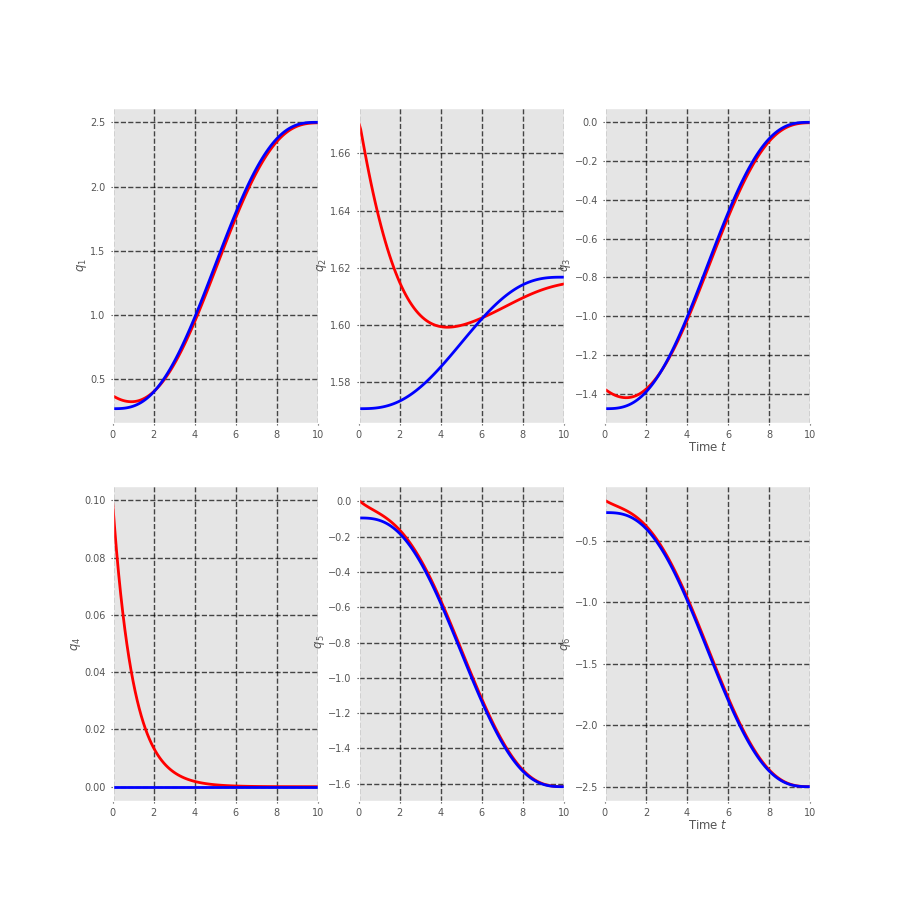

In [92]:
q1, q2,q3, q4,q5, q6 ,q7= x_nl[:,0],x_nl[:,1], x_nl[:,2],x_nl[:,3], x_nl[:,4],x_nl[:,5],x_nl[:,6]
dq1, dq2,dq3, dq4,dq5, dq6,dq7 = x_nl[:,7],x_nl[:,8],x_nl[:,9], x_nl[:,10],x_nl[:,11],x_nl[:,12]

plt.figure(figsize=(9,9))
plt.subplot(2, 3, 1)
# plt.title(title)
plt.plot(t1, q1, linewidth=2.0, color = 'red')
plt.plot(t1, traj.q[:,0], linewidth=2.0, color = 'blue')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.xlim([0, T0])
plt.ylabel(r'${q_1} $')

plt.subplot(2, 3, 2)
plt.plot(t1, q2, linewidth=2.0, color = 'red')
plt.plot(t1, traj.q[:,1], linewidth=2.0, color = 'blue')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.xlim([0, T0])
plt.ylabel(r'${q_2}$')
        
plt.subplot(2, 3, 3)
plt.plot(t1, q3, linewidth=2.0, color = 'red')
plt.plot(t1, traj.q[:,2], linewidth=2.0, color = 'blue')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.xlim([0, T0])
plt.ylabel(r'${q_3}$')
plt.xlabel(r'Time $t$')

plt.subplot(2, 3, 4)
plt.plot(t1, q4, linewidth=2.0, color = 'red')
plt.plot(t1, traj.q[:,3], linewidth=2.0, color = 'blue')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.xlim([0, T0])
plt.ylabel(r'${q_4}$')

plt.subplot(2, 3, 5)
plt.plot(t1, q5, linewidth=2.0, color = 'red')
plt.plot(t1, traj.q[:,4], linewidth=2.0, color = 'blue')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.xlim([0, T0])
plt.ylabel(r' ${q_5}$')
        
plt.subplot(2, 3, 6)
plt.plot(t1, q6, linewidth=2.0, color = 'red')
plt.plot(t1, traj.q[:,5], linewidth=2.0, color = 'blue')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.xlim([0, T0])
plt.ylabel(r'${q_6}$')
plt.xlabel(r'Time $t$')

plt.show()  

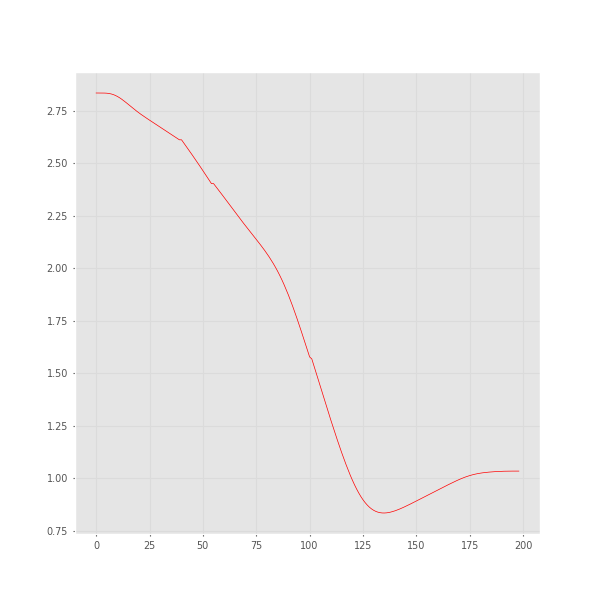

In [67]:
#q1 = continuer(con_path[:,1])
plt.figure(figsize=(6,6))
plt.plot(q1,'r')
#plt.plot(con_path[:,1],'k')
#print(q1)

In [68]:
dq1 = np.empty(len(q1))
dq1[0]=0
for i in range(1,len(q1)):
    dq1[i]=(q1[i]-q1[i-1])/0.01


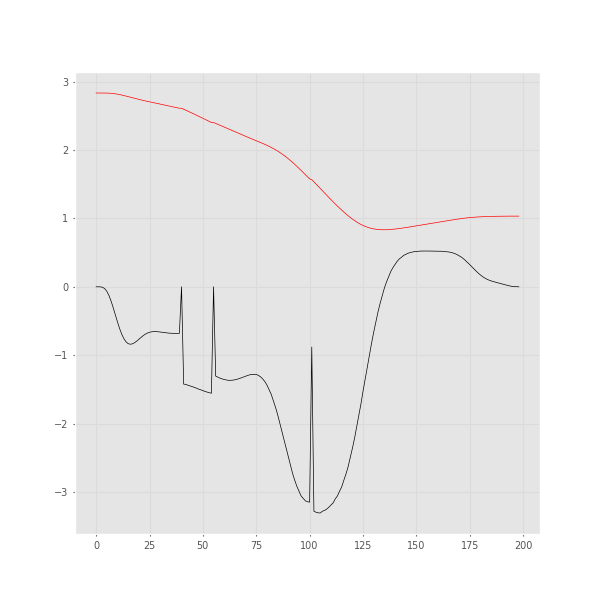

In [69]:
plt.figure(figsize=(6,6))
plt.plot(q1,'r')
plt.plot(dq1,'k')